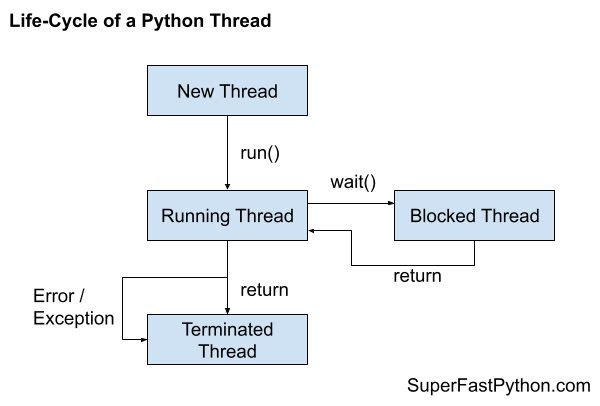

## Example of Running a Function in a Thread

In [2]:
from time import sleep
from threading import Thread

# a custom function that blocks for a moment
def task():
    # block for a moment
    sleep(1)
    # display a message
    print('This is from another thread')

# create a thread
thread = Thread(target=task)
# run the thread
thread.start()
# wait for the thread to finish
print('Waiting for the thread...')
print("Hello")
thread.join()
print("TEST")


Waiting for the thread...
Hello
This is from another thread
TEST


In [3]:
def task(sleep_time, message):
    # block for a moment
    sleep(sleep_time)
    # display a message
    print(message)

In [7]:
thread = Thread(target=task, args=(3, 'HELLO'))

In [8]:
thread.start()
print('Waiting for the thread...')
print("TEST")

Waiting for the thread...
TEST
HELLO


Waiting for the thread...


## Thread Class

In [10]:
from time import sleep
from threading import Thread

class CustomThread(Thread):
    def run(self):
        # block for a moment
        sleep(1)
        # display a message
        print('This is coming from another thread')

thread = CustomThread()
# start the thread
thread.start()
# wait for the thread to finish
thread.join()
print('Waiting for the thread to finish')

This is coming from another thread
Waiting for the thread to finish


## Thread Instance Attributes

In [14]:
from threading import Thread
# create the thread
thread = Thread()
# report the thread name
print(thread.name)

Thread-14


In [15]:
from threading import Thread
# create the thread
thread = Thread()
# report the daemon attribute
print(thread.daemon)

False


In [19]:
thread = Thread()
# report the thread identifier
print(thread.ident)
# start the thread
thread.start()
# report the thread identifier
print(thread.ident)

None
140223475336896


In [20]:
from threading import Thread
# create the thread
thread = Thread()
# report the thread is alive
print(thread.is_alive())

False


In [17]:
from time import sleep
from threading import Thread
# create the thread
thread = Thread(target=lambda:sleep(1))
# report the thread is alive
print(thread.is_alive())
# start the thread
thread.start()
# report the thread is alive
print(thread.is_alive())
# wait for the thread to finish
sleep(2)
print(thread.is_alive())
thread.join()
# report the thread is alive


False
True
True


### Main Thread

In [18]:
from threading import current_thread
# get the main thread
thread = current_thread()
# report properties for the main thread
print(f'name={thread.name}, daemon={thread.daemon}, id={thread.ident}')

name=MainThread, daemon=False, id=139829383580544


### Exception Handling

In [20]:
from time import sleep
import threading

# target function that raises an exception
def work():
    print('Working...')
    sleep(1)
    # rise an exception
    raise Exception('Something bad happened')

def custom_hook(args):
    # report the failure
    print(f'Thread failed: {args.exc_value}')

threading.excepthook = custom_hook
# create a thread
thread = threading.Thread(target=work)
# run the thread
thread.start()
# wait for the thread to finish
thread.join()
# continue on
print('Continuing on...')

Working...
Thread failed: Something bad happened
Continuing on...


In [19]:
from time import sleep
import threading

# target function that raises an exception
def work():
    print('Working...')
    sleep(1)
    # rise an exception
    raise Exception('Something bad happened')

# create a thread
thread = threading.Thread(target=work)
# run the thread
thread.start()
# wait for the thread to finish
thread.join()
# continue on
print('Continuing on...')

Working...


Exception in thread Thread-18 (work):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_145106/3884339732.py", line 9, in work
Exception: Something bad happened


Continuing on...


## Local Storage

In [21]:
from time import sleep
import threading

# custom target function
def task(value):
    # create a local storage
    local = threading.local()
    # store data
    local.value = value
    # block for a moment
    sleep(value)
    # retrieve value
    print(f'Stored value: {local.value}')

# create and start a thread
threading.Thread(target=task, args=(1,)).start()
# create and start another thread
threading.Thread(target=task, args=(2,)).start()

Stored value: 1
Stored value: 2


## MUTEX LOCK 

In [42]:
from time import sleep
from random import random
from threading import Thread
from threading import Lock

# work function
def task(lock, identifier, value):
    # acquire the lock
    with lock:
        print(f'>thread {identifier} got the lock, sleeping for {value}')
        sleep(value)

# create a shared lock
lock = Lock()
# start a few threads that attempt to execute the same critical section
for i in range(10):
    # start a thread
    Thread(target=task, args=(lock, i, random())).start()
# wait for all threads to finish...

>thread 0 got the lock, sleeping for 0.0023331286922213534
>thread 1 got the lock, sleeping for 0.24829502645435342
>thread 2 got the lock, sleeping for 0.7329181154892377
>thread 3 got the lock, sleeping for 0.6746179306512704
>thread 4 got the lock, sleeping for 0.9419325172663379
>thread 5 got the lock, sleeping for 0.1443289547885479
>thread 6 got the lock, sleeping for 0.9335959249219037
>thread 7 got the lock, sleeping for 0.672995311427754
>thread 8 got the lock, sleeping for 0.5952421494927292
>thread 9 got the lock, sleeping for 0.5447797827659331


## RLOCK

In [45]:
from time import sleep
from random import random
from threading import Thread
from threading import RLock

# reporting function
def report(lock, identifier):
    # acquire the lock
    with lock:
        print(f'>thread {identifier} done')

# work function
def task(lock, identifier, value):
    # acquire the lock
    with lock:
        print(f'>thread {identifier} sleeping for {value}')
        sleep(value)
        # report
        report(lock, identifier)

# create a shared reentrant lock
lock = RLock()
# start a few threads that attempt to execute the same critical section
for i in range(10):
    # start a thread
    Thread(target=task, args=(lock, i, random())).start()

>thread 0 sleeping for 0.692258242634017
>thread 0 done
>thread 1 sleeping for 0.6876325752616583
>thread 1 done
>thread 2 sleeping for 0.4435314868921675
>thread 2 done
>thread 3 sleeping for 0.15465371310916698
>thread 3 done
>thread 4 sleeping for 0.9760446423918978
>thread 4 done
>thread 5 sleeping for 0.7225242123798922
>thread 5 done
>thread 6 sleeping for 0.5332161206065744
>thread 6 done
>thread 7 sleeping for 0.023138188668224924
>thread 7 done
>thread 8 sleeping for 0.5079030738448392
>thread 8 done
>thread 9 sleeping for 0.06761968977394506
>thread 9 done


### Condition

In [48]:
from time import sleep
from threading import Thread
from threading import Condition

# target function to prepare some work
def task(condition, work_list):
    # block for a moment
    sleep(1)
    # add data to the work list
    work_list.append(33)
    # notify a waiting thread that the work is done
    print('Thread sending notification...')
    with condition:
        condition.notify()

# create a condition
condition = Condition()
# prepare the work list
work_list = list()
# wait to be notified that the data is ready
print('Main thread waiting for data...')
with condition:
    # start a new thread to perform some work
    worker = Thread(target=task, args=(condition, work_list))
    worker.start()
    # wait to be notified
    condition.wait()
# we know the data is ready
print(f'Got data: {work_list}')

Main thread waiting for data...
Thread sending notification...
Got data: [33]


### SEMAPHORE

In [28]:
from time import sleep
from random import random
from threading import Thread
from threading import Semaphore

# target function
def task(semaphore, number):
    # attempt to acquire the semaphore
    with semaphore:
        # process
        value = random()
        sleep(value+1)
        # report result
        print(f'Thread {number} got {value}')

# create a semaphore
semaphore = Semaphore(1)
# create a suite of threads
for i in range(10):
    worker = Thread(target=task, args=(semaphore, i))
    worker.start()

Thread 0 got 0.11463479210438421
Thread 2 got 0.16872234804632824
Thread 1 got 0.7078683434297265
Thread 4 got 0.31881312656987704
Thread 3 got 0.4431926013890962
Thread 5 got 0.2810911990914168
Thread 6 got 0.4519952166221063
Thread 7 got 0.9688885111077237
Thread 8 got 0.9387771722694632
Thread 9 got 0.4676578953059517


## Sync Patterns

### Randevu Patterni
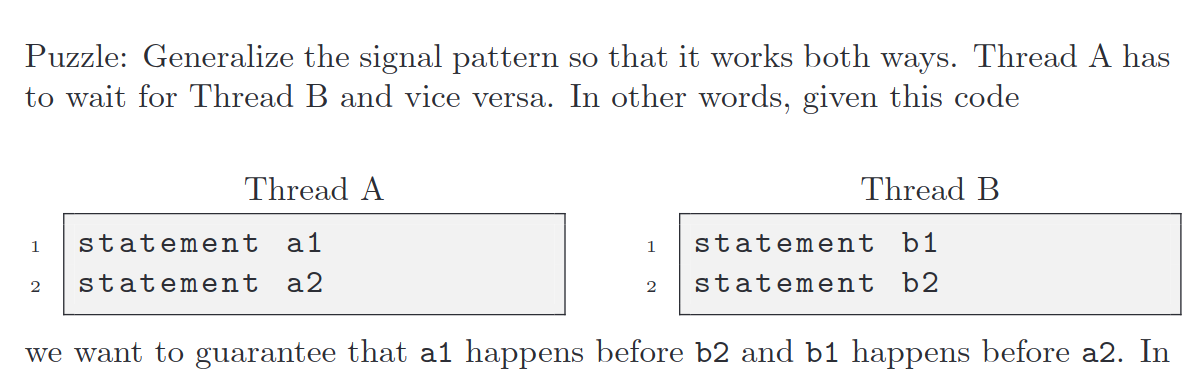

In [18]:
from threading import Thread
from threading import Lock

def taskA(lock):
    print("A1")
    with lock:
        print("A2")

def taskB(lock):
    print("B1")
    with lock:
        print("B2") 



lock = Lock()

A=Thread(target=taskA, args=(lock,))
B=Thread(target=taskB, args=(lock,))

A.start()
B.start()

A1
A2
B1
B2


In [22]:
from threading import Thread
from threading import Lock,Semaphore

def taskA(lockA,lockB):
    print("A1")
    lockA.release()
    lockB.acquire()
    print("A2")

def taskB(lockA,lockB):
    print("B1")
    lockB.release()
    lockA.acquire()
    print("B2") 


lockA = Semaphore(0)
lockB = Semaphore(0)

A=Thread(target=taskA, args=(lockA,lockB))
B=Thread(target=taskB, args=(lockA,lockB))

A.start()
B.start()

A1
B1
B2
A2
